<h1 style="font-size:3rem;color:orange;">Transverse Dynamics of a String</h1>

<h2 style="font-size:2rem;color:black;">Problem Statement:</h2>




### Given a string of length $l$, mass per unit length $\rho$, damping coefficient $b$, and external force $f$, and tension force $T$, compute natural frequency and impulse response.

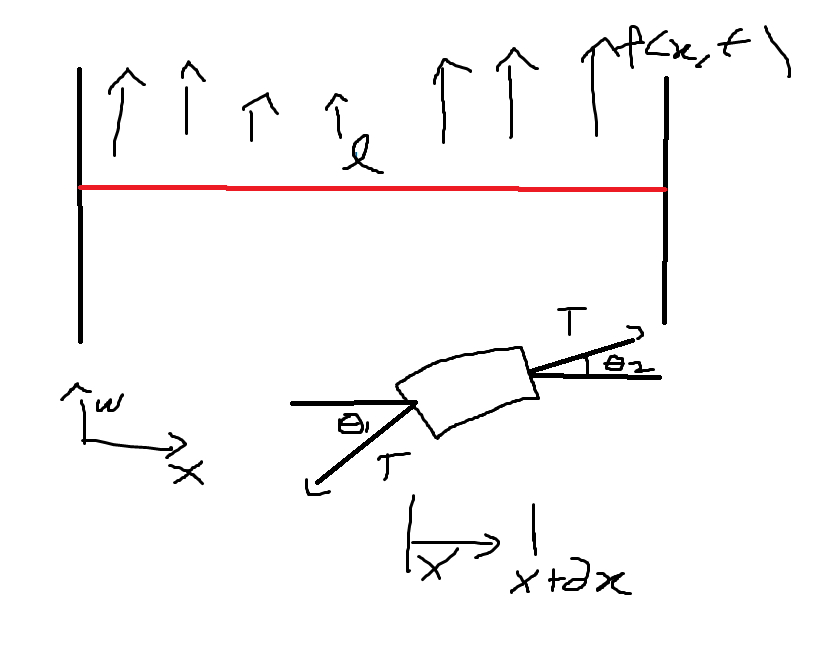

Using Newtons second law on the element:

## $\vec{F}=m\vec{a}$

## $\rho (x) dx \dfrac{\partial^2 w(x,t)}{\partial t^2} = f(x,t)dx - b\dfrac{\partial w(x,t)}{\partial t}dx - T\sin{\theta_1(x,t)} + T\sin{\theta_2(x,t)}$

For small $\theta$:

$\sin{\theta_1}=\theta_1=\tan{\theta_1}=\dfrac{dw}{dx}$

$\sin{\theta_2}=\theta_2=\tan{\theta_2}$

$\theta_2=\theta_1+\dfrac{d\theta_1}{dx}=\dfrac{dw}{dx} + \dfrac{d}{dx}\dfrac{dw}{dx}dx$

$\sin{\theta_2}=\dfrac{dw}{dx} + \dfrac{d^2w}{dx^2}dx$

Re-writing the equations in terms of $w$ & $x$:

## $\rho (x) dx \dfrac{\partial^2 w(x,t)}{\partial t^2} = f(x,t)dx - b\dfrac{\partial w(x,t)}{\partial t}dx - T\dfrac{dw(x,t)}{dx} + T(\dfrac{dw(x,t)}{dx} + \dfrac{d^2w(x,t)}{dx^2}dx)$

Cancelling tension terms and dx:

## $\rho (x) \dfrac{\partial^2 w(x,t)}{\partial t^2} = f(x,t) - b\dfrac{\partial w(x,t)}{\partial t} + T\dfrac{d^2w(x,t)}{dx^2}$

Below is the undamped, undriven response:

## $\dfrac{\partial^2 w(x,t)}{\partial t^2} = \dfrac{T}{\rho (x)}\dfrac{\partial^2w(x,t)}{\partial x^2}$

The wave equation in one dimensional space is:

## $\dfrac{\partial^2 u}{\partial t^2} = c^2\dfrac{\partial^2 u}{\partial x^2}$

From the above, the wave propogation speed c is $\sqrt{\dfrac{T}{\rho (x)}}$

Going back, we can check out solution using dimensional analysis:

## $m*s^{-2} = kg*m*s^{-2}*m*kg^{-1}*m*m^{-2}$

The terms on left and right balance.

Back to the problem at hand, we bring the terms to the LHS and divide by $\rho$:

## $\dfrac{\partial^2 w(x,t)}{\partial t^2} - \dfrac{T}{\rho}\dfrac{d^2w(x,t)}{dx^2} + \dfrac{b}{\rho}\dfrac{\partial w(x,t)}{\partial t} - \dfrac{1}{\rho}f(x,t) = 0$

Converting the above to discrete form:

$ \dfrac{w[x,t+1]-2w[x,t]+w[x,t-1]}{(\Delta t)^2} - \dfrac{T}{\rho}\dfrac{w[x+1,t]-2w[x,t]+w[x-1,t]}{(\Delta x)^2} + \dfrac{b}{\rho}\dfrac{w[x,t+1]-w[x,t-1]}{\Delta t} - \dfrac{1}{\rho}f(x,t)=0$

Solving for displacement w(x+1,t) with sympy:

In [32]:
import numpy as np
import time
import matplotlib.pylab as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from sympy import *
import sympy as smp
smp.init_printing()

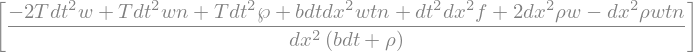

In [33]:
wp, w, wn, dt, dx, T, rho, b, f, wtp, wtn = smp.symbols('wp w wn dt dx T rho b f wtp wtn')
k1 = (wtp-(2*w)+wtn)/(dt**2)
k2 = (T/rho)*(wp-(2*w)+wn)/(dx**2)
k3 = 1*(b/rho)*(wtp-wtn)/dt
k4 = 1*(1/rho)*f
eqn = smp.Eq(0,k1 - k2 + k3 - k4)
#eqn = smp.Eq(0,k2-k1)
#eqn = smp.Eq(0,k1 - k2)
(solve(eqn,wtp))  


Create an array to hold the positions:

Wave Velocity:  10000.0  m/s
Stability Constant:  0.19999999999999998


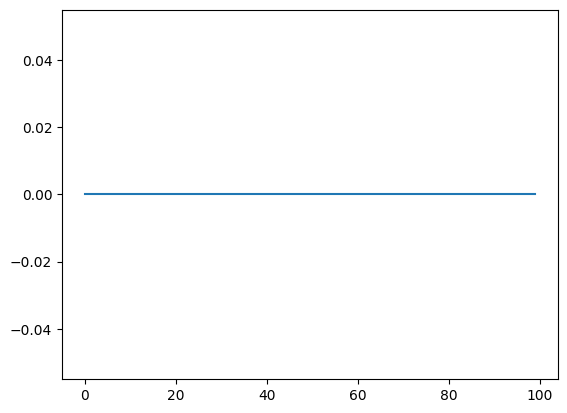

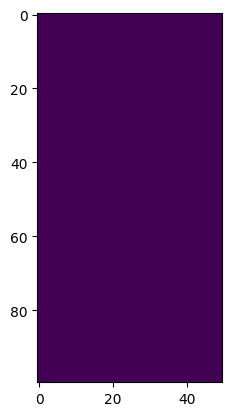

In [42]:
#Geometry
L = 5.0#[m]

#Materials
rho = 0.00000001 #[kg/m]
T = 1.0
b = 0*0.000001

c = (T/rho)**0.5

n_x = 100
t0 = 0.0
tf = 1.0/100
n_t = int(1000000/100)
x = np.linspace(0.0,L,n_x)
t = np.linspace(0,tf,n_t)
w = np.zeros((n_x,n_t))
n = np.linspace(0,n_x,n_x)

#Boundary Conditions
x0 = 0.0#[m]
xf = L#[m]

dt = (tf-t0)/n_t
dx = (xf-x0)/n_x

print('Wave Velocity: ', str(c), ' m/s')
print('Stability Constant: ', str(c*dt/dx))

#Stimulus
f = np.zeros((n_x,n_t))

f_forcing = 2
#No forcing
if f_forcing == 0:
    f = np.zeros((n_x,n_t))
#Constant forcing
elif f_forcing == 1:
    f[3,:] = np.sin(2*3.1415926*5000*t)
#Single period sine burst
elif f_forcing == 2:
    f_lambda = L/10
    f_freq = c/f_lambda
    f_T = 1/f_freq
    f_n = int(f_T/dt)
    f_amplitude = 20
    f[3,0:f_n] = f_amplitude*np.sin(2*3.1415926*f_freq*t[0:f_n])

#Initial Conditions
f_initial = 0

if f_initial == 0:
    #Zero state
    w[:,:] = 0
elif f_initial == 1:
    #Half-sine stretched string
    w[:,0]=(-np.cos((2*3.145926/n_x)*n)+1)/2
    w[:,1]=(-np.cos((2*3.145926/n_x)*n)+1)/2
    w[:,2]=(-np.cos((2*3.145926/n_x)*n)+1)/2

#Boundary Conditions
w[0:2,:] = 0
w[n_x-2:n_x,:] = 0

#Show initial and boundary conditions
plt.plot(w[:,0])
plt.show()
plt.imshow(w[:,0:50])



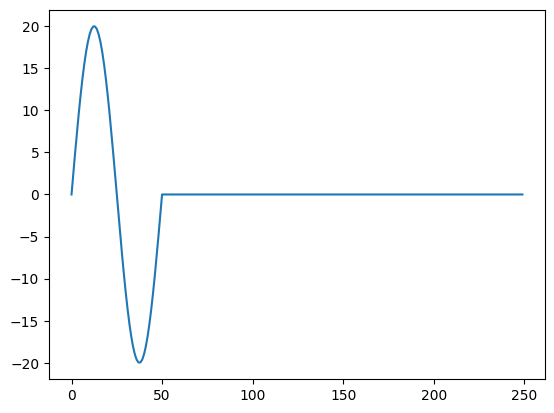

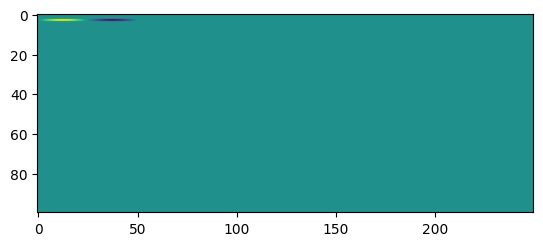

In [43]:
plt.plot(f[3,:250])
plt.show()
plt.imshow(f[:,0:250])

In [44]:
#Create animation function
#def crunch(fps):
    

In [45]:
metadata = dict(title='Movie', artist='Nathaniel_Rohrick')
writer = PillowWriter(fps=25,metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k--')
plt.xlim(0,L)
plt.ylim(-2,2)
plt.xlabel('Position (m)')
plt.ylabel('Displacement (m)')
plt.title('Dynamics of String Under Tension')
l.set_data(x,w[:,0])
print('init')
with writer.saving(fig, 'wiggle.gif', 100):
    for j in range(n_t):#Iterate in time

        if j == 0:
            continue
        if j > n_t-2:
            continue
        for i in range(n_x):#Iterate in space
            if i < 2:#Boundary condition
                continue
            if i > n_x-3:#Boundary condition
                continue
            #Free vibration equation no damping
            #w[i,j+1] = ((T*dt**2*(-2*w[i,j] + w[i-1,j] + w[i+1,j]) + (dx**2)*rho*(2*w[i,j] - w[i,j-1])) / ((dx**2)*rho))
            #Vibration equation with viscous damping
            w[i,j+1] = ((T*dt**2*(-2*w[i,j]+w[i-1,j]+w[i+1,j]) + b*dt*dx**2*w[i,j-1] + dt**2*dx**2*f[i,j] + 2*dx**2*rho*w[i,j]-dx**2*rho*w[i,j-1])/(dx**2*(b*dt + rho)))
    print('simulation complete')
    k_simscale = 10
    for j in range(int(n_t/k_simscale)):
        l.set_data(x,w[:,int(j*k_simscale)])
        writer.grab_frame()
    print('animation complete')
print('done')
plt.close()

init
simulation complete
animation complete
done
